Importing the required Libraries for the estimation 

In [4]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import os 
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler #type: ignore
from sklearn.ensemble import RandomForestClassifier #type: ignore
from sklearn.linear_model import LogisticRegression #type: ignore
from sklearn.svm import SVC #type: ignore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

Loading the CSV file 

In [5]:
# Load your CSV file
data = pd.read_csv('framingham .csv')  # Replace 'patient_data.csv' with your file path

# Check the first few rows of the data
data.head()
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


Data Preprocessing
Handle missing values: Depending on the dataset, you may need to fill or drop missing values.

In [6]:
# Check for missing values
data.isnull().sum()

# Fill missing values or drop rows/columns with missing data
data.fillna(data.mean(), inplace=True)  # For numeric columns, fill with mean
# OR
# data.dropna(inplace=True)  # Drop rows with missing values

print(data)




      male  age  education  currentSmoker  cigsPerDay    BPMeds  \
0        1   39        4.0              0         0.0  0.000000   
1        0   46        2.0              0         0.0  0.000000   
2        1   48        1.0              1        20.0  0.000000   
3        0   61        3.0              1        30.0  0.000000   
4        0   46        3.0              1        23.0  0.000000   
...    ...  ...        ...            ...         ...       ...   
4235     0   48        2.0              1        20.0  0.029615   
4236     0   44        1.0              1        15.0  0.000000   
4237     0   52        2.0              0         0.0  0.000000   
4238     1   40        3.0              0         0.0  0.000000   
4239     0   39        3.0              1        30.0  0.000000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0  

In [7]:
from sklearn.preprocessing import LabelEncoder #type: ignore

# Encode categorical variables (e.g., gender, smoking habits)
encoder = LabelEncoder()
data['male'] = encoder.fit_transform(data['male'])
data['currentSmoker'] = encoder.fit_transform(data['currentSmoker'])

In [8]:
# Assuming 'BPmeds' (whether on medication), 'sysBP' (systolic blood pressure), and 'diaBP' (diastolic blood pressure)
# If systolic BP > 140 or diastolic BP > 90 or they are on BP medications, they might be at risk for heart disease.

# Heart disease: Risk factors include high blood pressure and BP medications
data['heart_disease'] = ((data['sysBP'] > 140) |  # High systolic blood pressure
                          (data['diaBP'] > 90) |  # High diastolic blood pressure
                          (data['BPMeds'] == 1)).astype(int)  # On blood pressure medication

# If you have other health-related columns like smoking status, we can define lung disease as well (assuming smoking status is present).
# Example: If smoking status column exists, infer lung disease based on smoking
# data['lung_disease'] = (data['smoking_status'] == 1).astype(int)

# Now, separate the features (X) and target variable (y_heart)
X = data.drop(columns=['heart_disease'])  # Features (excluding the target variable 'heart_disease')
y_heart = data['heart_disease']  # Target for heart disease prediction




In [9]:
from sklearn.model_selection import train_test_split  # type: ignore
from sklearn.ensemble import RandomForestClassifier   # type: ignore
from sklearn.metrics import accuracy_score, classification_report  # type: ignore
# Split data into training and testing sets
X_train, X_test, y_heart_train, y_heart_test = train_test_split(X, y_heart, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier for heart disease prediction
rf_heart = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_heart.fit(X_train, y_heart_train)

# Make predictions
y_heart_pred = rf_heart.predict(X_test)

# Evaluate the model
print("Heart Disease Model Accuracy:")
print(accuracy_score(y_heart_test, y_heart_pred))
print(classification_report(y_heart_test, y_heart_pred))


Heart Disease Model Accuracy:
0.9988207547169812
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       282

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



In [10]:
# Create target variable for lung disease
# Assume lung disease is more likely if the person is a smoker or older than a certain age threshold (e.g., age > 50)

# Lung disease: Smoking status or age greater than 50 years could be indicators of lung disease risk
data['lung_disease'] = ((data['currentSmoker'] == 1) |  # If they smoke
                         (data['age'] > 50)).astype(int)  # Or if they are older than 50 years

# Now, separate the features (X) and target variable for both heart and lung disease
X = data.drop(columns=['heart_disease', 'lung_disease'])  # Features (excluding the target variables)
y_heart = data['heart_disease']  # Target for heart disease prediction
y_lung = data['lung_disease']  # Target for lung disease prediction



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets for both heart disease and lung disease
#X_train, X_test, y_heart_train, y_heart_test = train_test_split(X, y_heart, test_size=0.2, random_state=42)
X_train, X_test, y_lung_train, y_lung_test = train_test_split(X, y_lung, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier for both heart disease and lung disease predictions
#rf_heart = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lung = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the models
#rf_heart.fit(X_train, y_heart_train)
rf_lung.fit(X_train, y_lung_train)

# Make predictions
#y_heart_pred = rf_heart.predict(X_test)
y_lung_pred = rf_lung.predict(X_test)

# Evaluate the models
'''print("Heart Disease Model Accuracy:")
print(accuracy_score(y_heart_test, y_heart_pred))
print(classification_report(y_heart_test, y_heart_pred))'''

print("\nLung Disease Model Accuracy:")
print(accuracy_score(y_lung_test, y_lung_pred))
print(classification_report(y_lung_test, y_lung_pred))



Lung Disease Model Accuracy:
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       634

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



 Train-Test Split
Split the data into training and testing sets.

In [12]:

X_train, X_test, y_train_heart, y_test_heart = train_test_split(X, y_heart, test_size=0.2, random_state=42)
X_train, X_test, y_train_lung, y_test_lung = train_test_split(X, y_lung, test_size=0.2, random_state=42)


Feature Scaling (Optional but recommended)
Scaling features may help improve model performance, especially for algorithms like Logistic Regression or SVM.

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Training


In [14]:
#Model 1: Random Forest Classifier
# Initialize the model
rf_model_heart = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_lung = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model for heart disease
rf_model_heart.fit(X_train_scaled, y_train_heart)

# Train the model for lung disease
rf_model_lung.fit(X_train_scaled, y_train_lung)

#Model 2: Logistic Regression

# Initialize the model
log_reg_model_heart = LogisticRegression(random_state=42)
log_reg_model_lung = LogisticRegression(random_state=42)

# Train the model for heart disease
log_reg_model_heart.fit(X_train_scaled, y_train_heart)

# Train the model for lung disease
log_reg_model_lung.fit(X_train_scaled, y_train_lung)

#Model 3: Support Vector Machine (SVM)

# Initialize the model
svm_model_heart = SVC(random_state=42)
svm_model_lung = SVC(random_state=42)

# Train the model for heart disease
svm_model_heart.fit(X_train_scaled, y_train_heart)

# Train the model for lung disease
svm_model_lung.fit(X_train_scaled, y_train_lung)

SVC(random_state=42)

Model Evaluation
After training the models, evaluate them using metrics such as accuracy, confusion matrix, and classification report.

Evaluate Random Forest for Heart Disease

In [15]:
# Predict on test data
y_pred_heart_rf = rf_model_heart.predict(X_test_scaled)

# Calculate accuracy and print results
print("Random Forest Accuracy for Heart Disease:", accuracy_score(y_test_heart, y_pred_heart_rf))
print("Confusion Matrix for Heart Disease:")
print(confusion_matrix(y_test_heart, y_pred_heart_rf))
print("Classification Report for Heart Disease:")
print(classification_report(y_test_heart, y_pred_heart_rf))

Random Forest Accuracy for Heart Disease: 0.9988207547169812
Confusion Matrix for Heart Disease:
[[566   0]
 [  1 281]]
Classification Report for Heart Disease:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       282

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



Evaluate Random Forest for Lung Disease

In [16]:
# Predict on test data
y_pred_lung_rf = rf_model_lung.predict(X_test_scaled)

# Calculate accuracy and print results
print("Random Forest Accuracy for Lung Disease:", accuracy_score(y_test_lung, y_pred_lung_rf))
print("Confusion Matrix for Lung Disease:")
print(confusion_matrix(y_test_lung, y_pred_lung_rf))
print("Classification Report for Lung Disease:")
print(classification_report(y_test_lung, y_pred_lung_rf))

Random Forest Accuracy for Lung Disease: 1.0
Confusion Matrix for Lung Disease:
[[214   0]
 [  0 634]]
Classification Report for Lung Disease:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       634

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



Evaluate Logistic Regression for Heart Disease and logistic Regression for Lung Disease

In [17]:
# Predict on test data
y_pred_heart_log_reg = log_reg_model_heart.predict(X_test_scaled)

# Calculate accuracy and print results
print("Logistic Regression Accuracy for Heart Disease:", accuracy_score(y_test_heart, y_pred_heart_log_reg))

# Predict on test data
y_pred_lung_log_reg = log_reg_model_lung.predict(X_test_scaled)

# Calculate accuracy and print results
print("Logistic Regression Accuracy for Lung Disease:", accuracy_score(y_test_lung, y_pred_lung_log_reg))

Logistic Regression Accuracy for Heart Disease: 0.9587264150943396
Logistic Regression Accuracy for Lung Disease: 0.9964622641509434



Evaluate SVM for  Heart Disease and for Lung Disease


In [18]:
# Predict on test data
y_pred_heart_svm = svm_model_heart.predict(X_test_scaled)

# Calculate accuracy and print results
print("SVM Accuracy for Heart Disease:", accuracy_score(y_test_heart, y_pred_heart_svm))

# Predict on test data
y_pred_lung_svm = svm_model_lung.predict(X_test_scaled)

# Calculate accuracy and print results
print("SVM Accuracy for Lung Disease:", accuracy_score(y_test_lung, y_pred_lung_svm))


SVM Accuracy for Heart Disease: 0.9575471698113207
SVM Accuracy for Lung Disease: 0.9799528301886793


Model Comparison
You can compare the performance of the models by looking at accuracy scores or using plots:

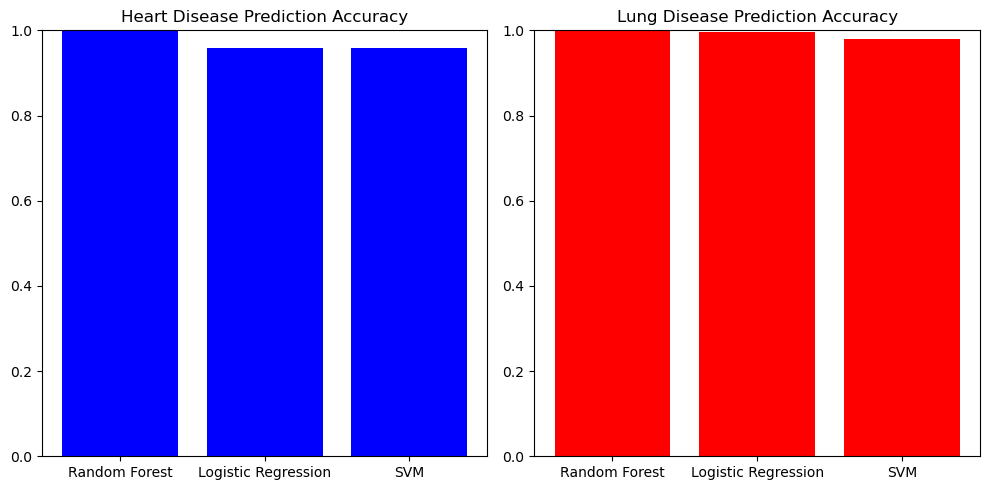

In [19]:

models = ['Random Forest', 'Logistic Regression', 'SVM']
heart_accuracies = [accuracy_score(y_test_heart, y_pred_heart_rf), 
                    accuracy_score(y_test_heart, y_pred_heart_log_reg),
                    accuracy_score(y_test_heart, y_pred_heart_svm)]

lung_accuracies = [accuracy_score(y_test_lung, y_pred_lung_rf), 
                   accuracy_score(y_test_lung, y_pred_lung_log_reg),
                   accuracy_score(y_test_lung, y_pred_lung_svm)]

plt.figure(figsize=(10,5))

# Heart Disease
plt.subplot(1, 2, 1)
plt.bar(models, heart_accuracies, color='blue')
plt.title('Heart Disease Prediction Accuracy')
plt.ylim(0, 1)

# Lung Disease
plt.subplot(1, 2, 2)
plt.bar(models, lung_accuracies, color='red')
plt.title('Lung Disease Prediction Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Exploratory Data Analysis

Dataset Overview and Handle Missing Values

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
#data = pd.read_csv('your_data.csv')  # Replace with your actual file path

# 1. 
print("Dataset Overview:")
print(data.head())  # Show first few rows of the dataset
print("\nDataset Info:")
print(data.info())  # Get info about the dataset, including data types and missing values
print("\nMissing Values:")
print(data.isnull().sum())  # Count missing values in each column
print("\nDescriptive Statistics:")
print(data.describe())  # Get summary statistics for numerical features

# 2. 
# Here, we're filling missing values with mean for numerical columns
data.fillna(data.mean(), inplace=True)  # You could also drop missing values using dropna() if preferred

Dataset Overview:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  heart_disease  lu

Visualizing the Distribution of Key Features

<Figure size 1200x1000 with 0 Axes>

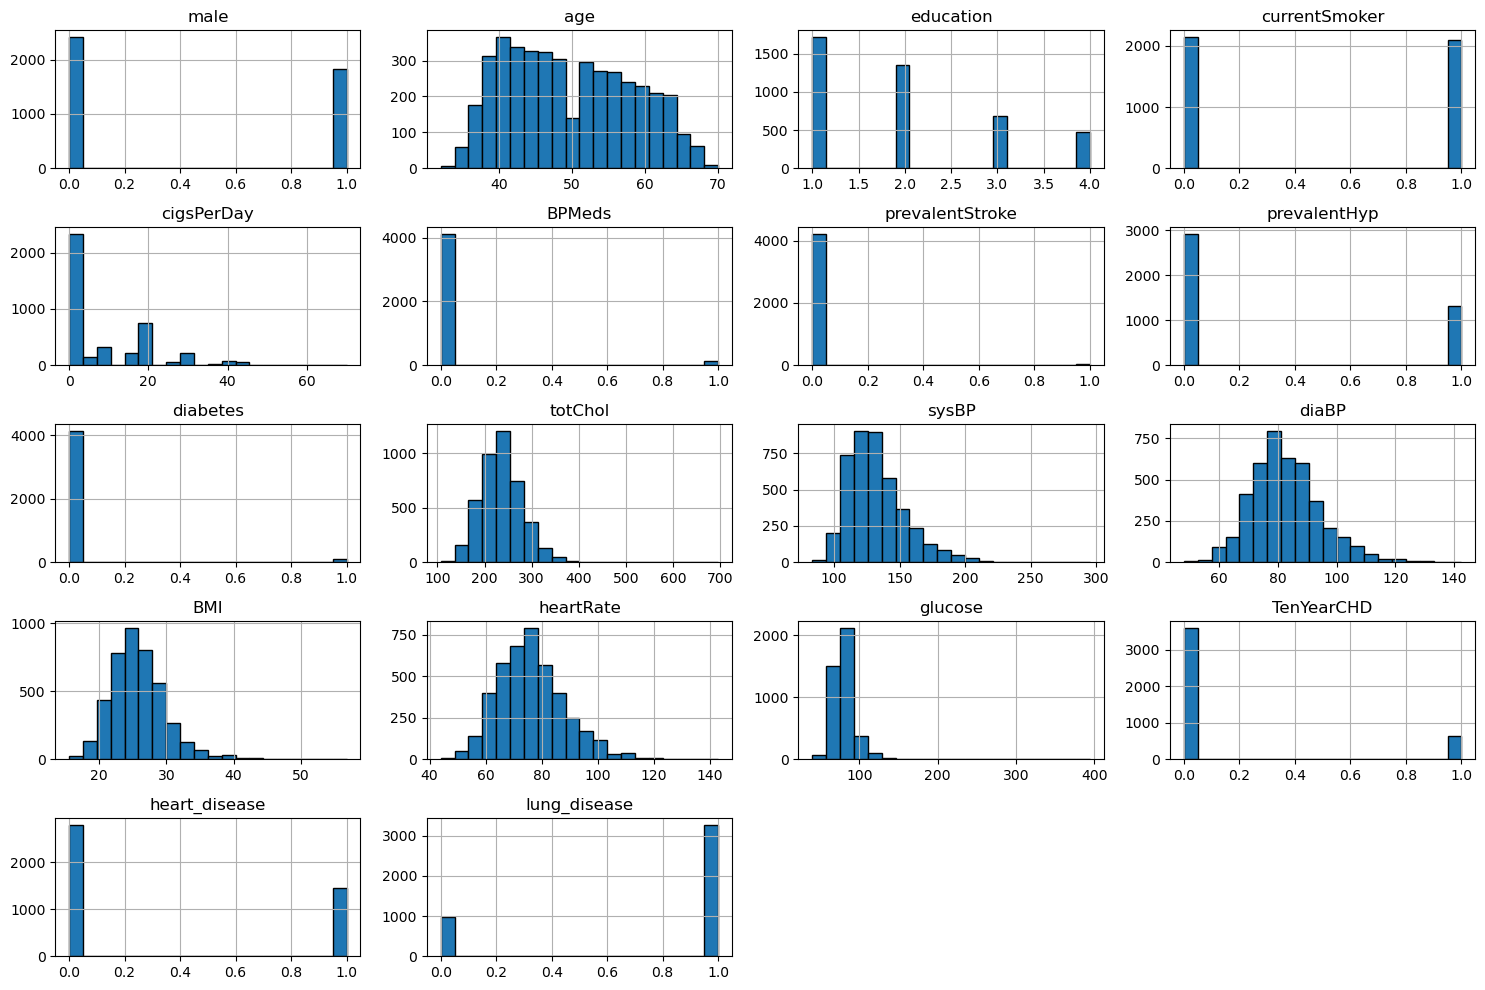

In [21]:
# Plot histograms for numerical features
numerical_columns = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
data[numerical_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

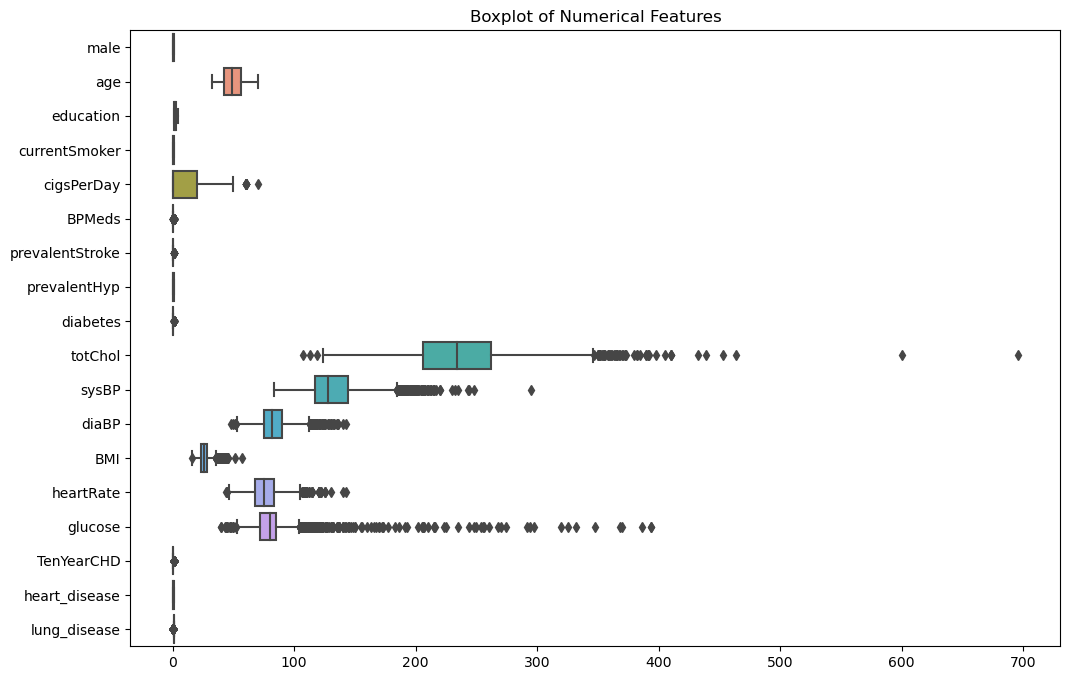

In [22]:
# Boxplot to check for outliers in numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns], orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()

Correlation Heatmap

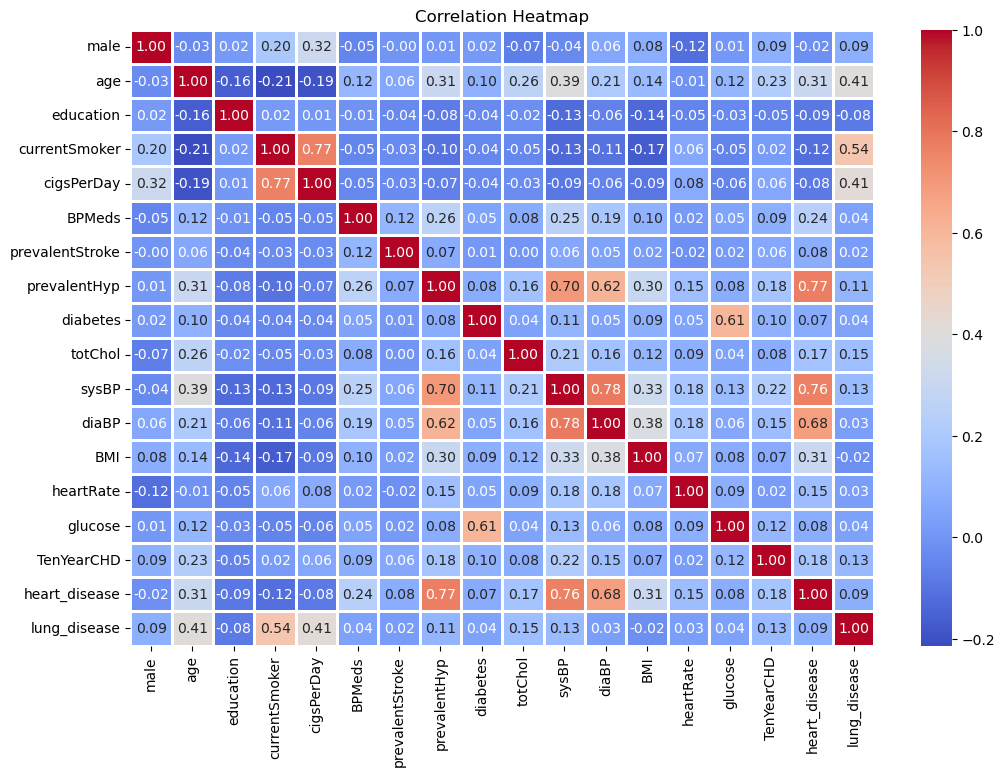

In [23]:
# Check correlations between features
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

Visualizing the Distribution of Target Variables

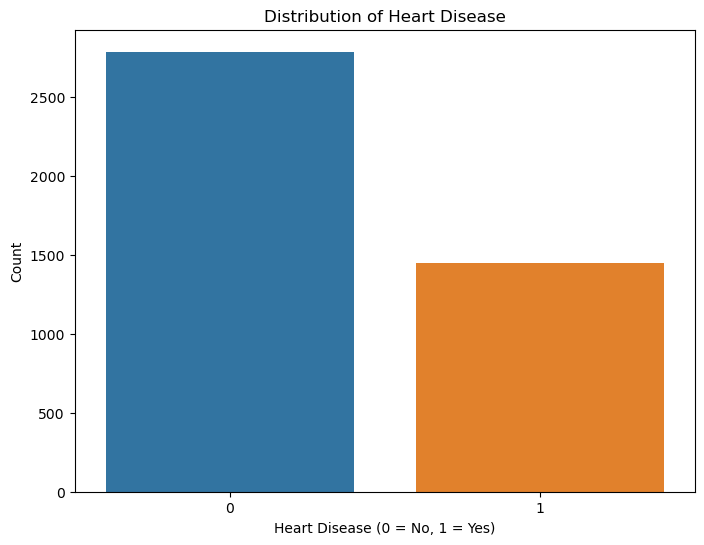

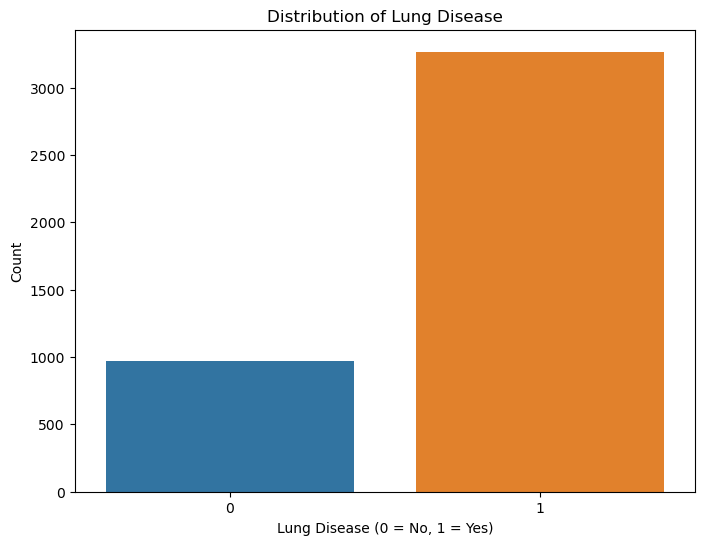

In [24]:
# Plot the distribution of heart disease and lung disease
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', data=data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='lung_disease', data=data)
plt.title('Distribution of Lung Disease')
plt.xlabel('Lung Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Feature Interaction with Target Variables (Heart Disease and Lung Disease)


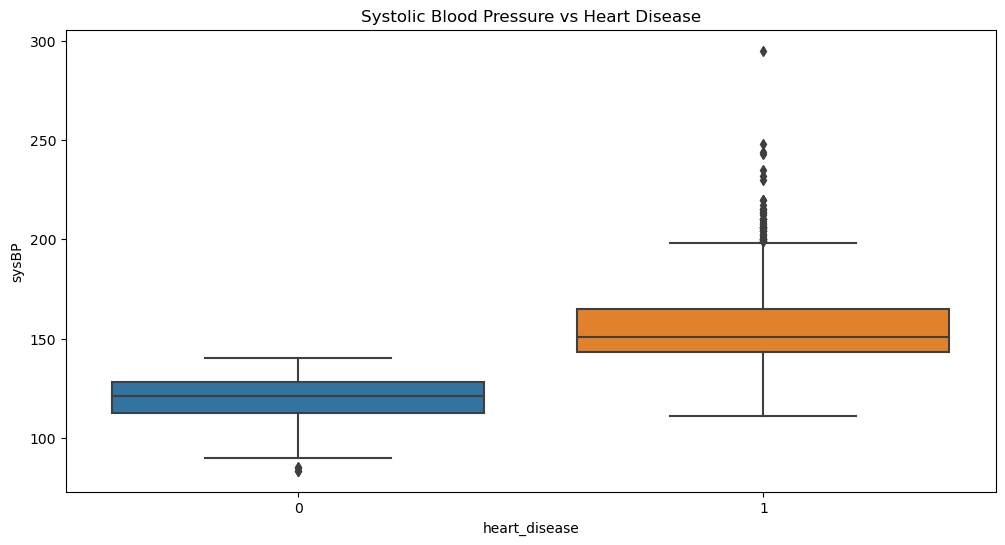

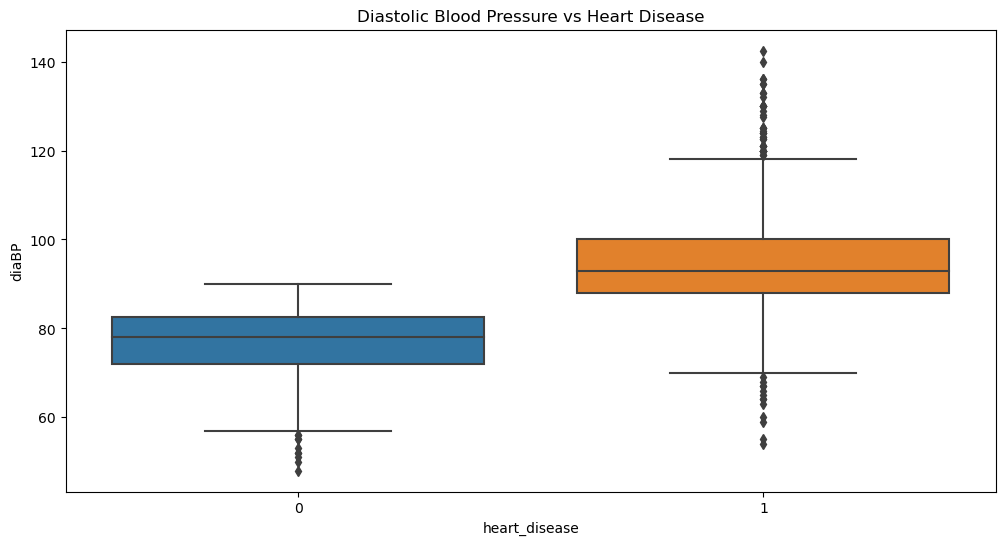

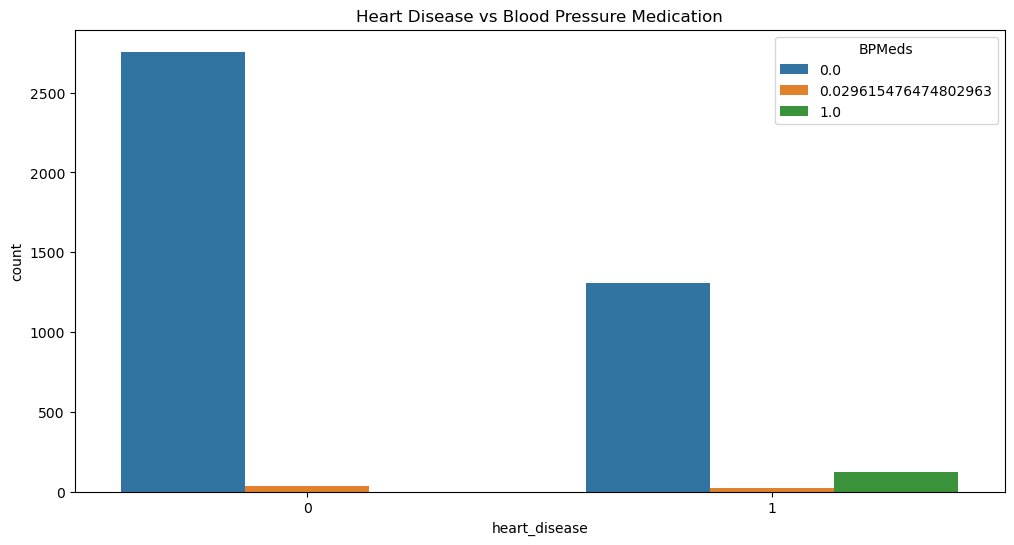

In [25]:
# Visualize the relationship between important features and the target variable (heart_disease)
plt.figure(figsize=(12, 6))
sns.boxplot(x='heart_disease', y='sysBP', data=data)
plt.title('Systolic Blood Pressure vs Heart Disease')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='heart_disease', y='diaBP', data=data)
plt.title('Diastolic Blood Pressure vs Heart Disease')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='heart_disease', hue='BPMeds', data=data)
plt.title('Heart Disease vs Blood Pressure Medication')
plt.show()

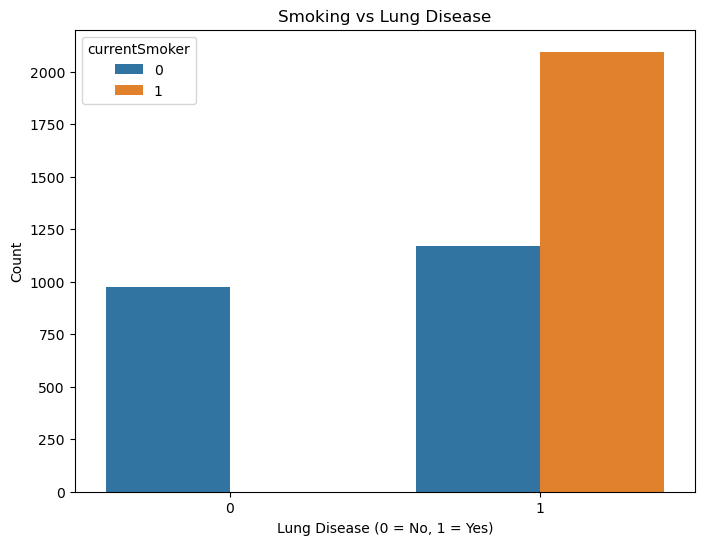

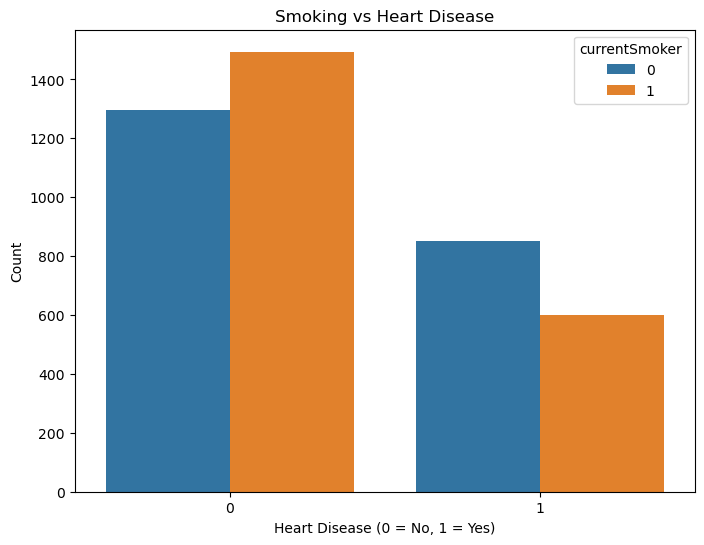

In [26]:
# Visualize the relationship between smoking and lung disease
plt.figure(figsize=(8, 6))
sns.countplot(x='lung_disease', hue='currentSmoker', data=data)
plt.title('Smoking vs Lung Disease')
plt.xlabel('Lung Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', hue='currentSmoker', data=data)
plt.title('Smoking vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


Exploring the Distribution of Age for Both Heart and Lung Disease

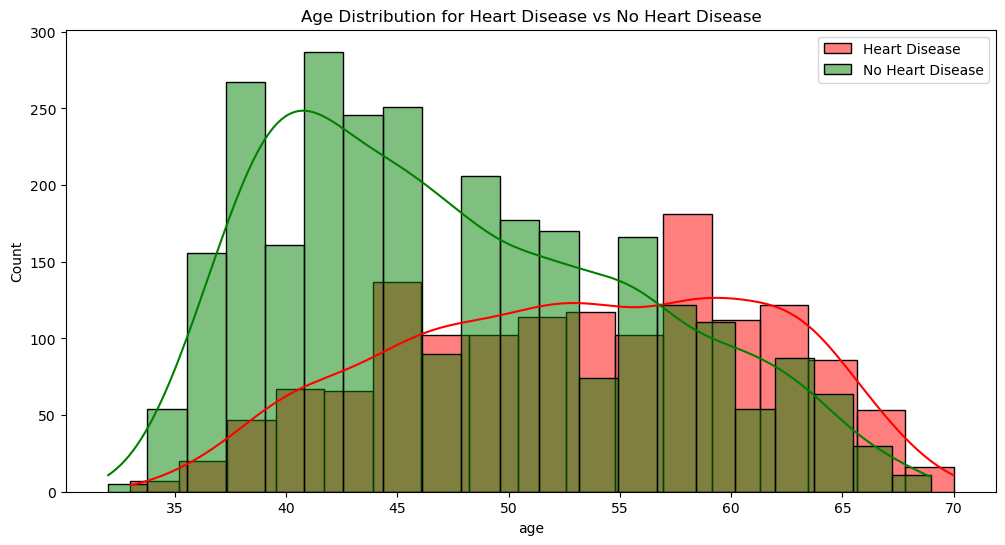

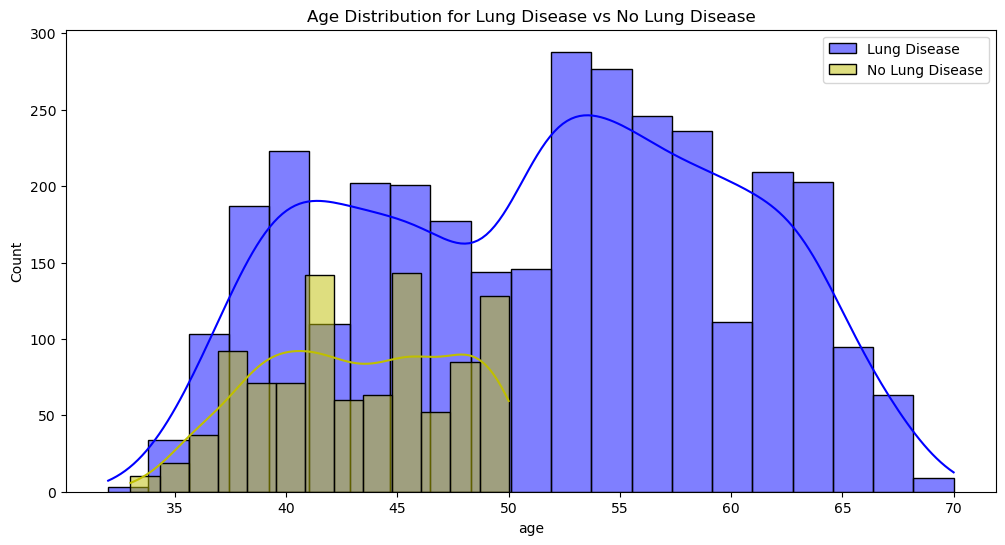

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['heart_disease'] == 1]['age'], kde=True, color='r', label='Heart Disease')
sns.histplot(data=data[data['heart_disease'] == 0]['age'], kde=True, color='g', label='No Heart Disease')
plt.title('Age Distribution for Heart Disease vs No Heart Disease')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['lung_disease'] == 1]['age'], kde=True, color='b', label='Lung Disease')
sns.histplot(data=data[data['lung_disease'] == 0]['age'], kde=True, color='y', label='No Lung Disease')
plt.title('Age Distribution for Lung Disease vs No Lung Disease')
plt.legend()
plt.show()

 Pairplot to Show Relationships Between Variables

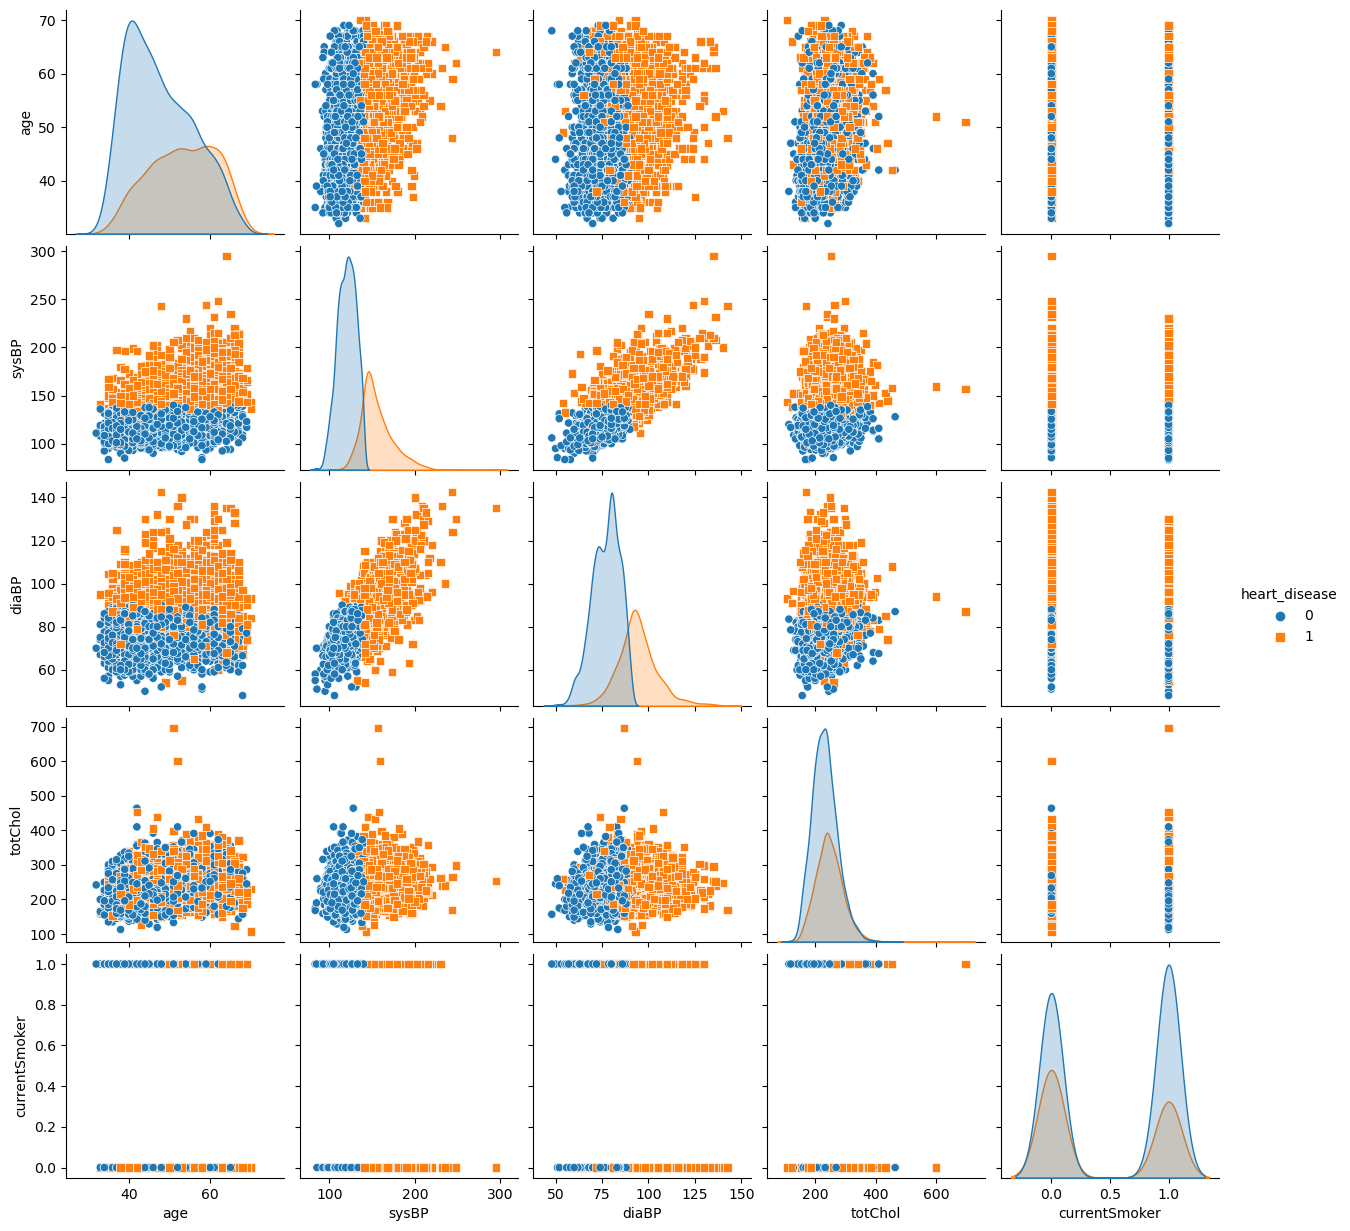

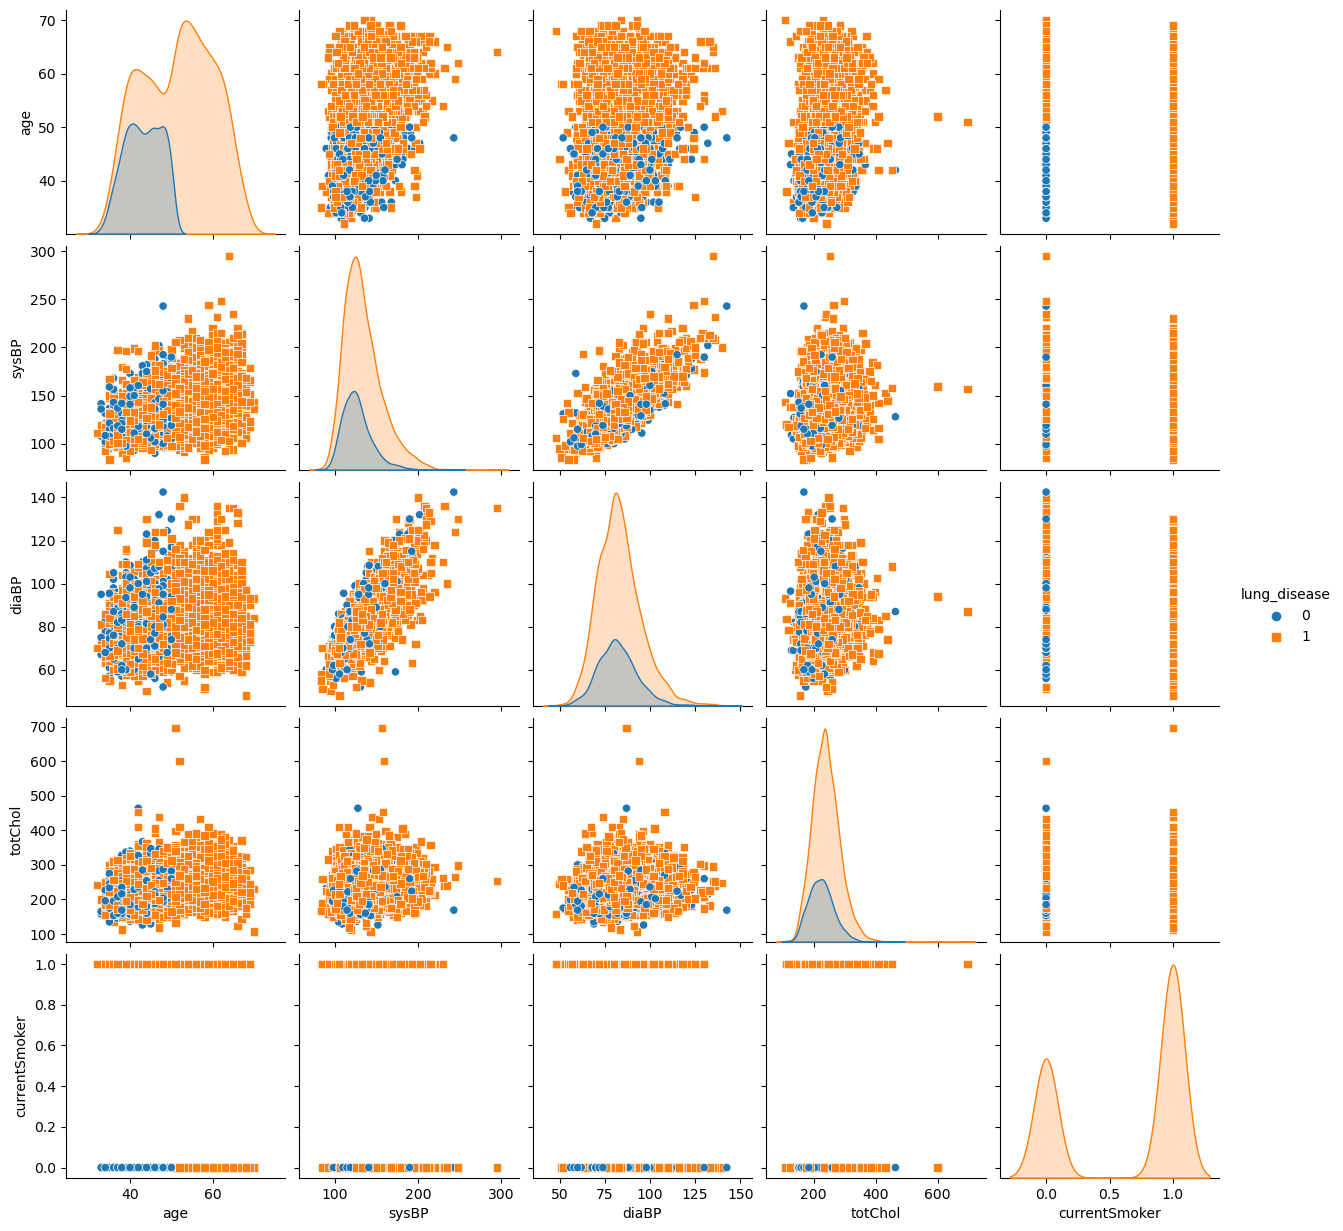

In [28]:
 
# Pairplot to Show Relationships Between Variables
# Pairplot to show interactions between features, colored by the heart_disease target
sns.pairplot(data[['age', 'sysBP', 'diaBP', 'totChol', 'currentSmoker', 'heart_disease']], 
             hue='heart_disease', diag_kind='kde', markers=["o", "s"])
plt.show()

# Pairplot for lung disease
sns.pairplot(data[['age', 'sysBP', 'diaBP', 'totChol', 'currentSmoker', 'lung_disease']], 
             hue='lung_disease', diag_kind='kde', markers=["o", "s"])
plt.show()
